In [18]:
import torch
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Setup directories and files

In [43]:
PATHS = {
    "data" : os.path.join("data"),
    "cars" : os.path.join("data", "cars"),
    "models" : os.path.join("models"),
}

DATA = {
    "img00" : os.path.join(PATHS["cars"], "car00.webp"),
    "img01" : os.path.join(PATHS["cars"], "car01.webp"),
    "img02" : os.path.join(PATHS["cars"], "car02.jpg"),
    "img03" : os.path.join(PATHS["cars"], "car03.jpg"),
    "img04" : os.path.join(PATHS["cars"], "car04.jpg"),
    "dashcam" : os.path.join(PATHS["cars"], "dashcam.mp4"),
}

MODELS = {
    "plates_pt" : os.path.join(PATHS["models"], "plates.pt"),
    "plates_onnx" : os.path.join(PATHS["models"], "plates.onnx"),
}

# Loading a model with YOLO5

In [41]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=MODELS["plates_pt"])

Using cache found in C:\Users\iperkins/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-29 Python-3.11.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


# Detect plate with pytorch model

In [42]:
results = model(DATA["img04"])
results.print()
results.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\plates\\car04.jpg'

# Read image with cv2

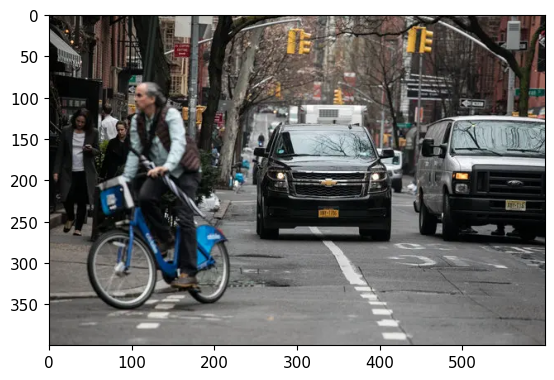

In [7]:
%matplotlib inline
img = cv2.imread(DATA["img00"])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
net = cv2.dnn.readNet(MODELS["plates_onnx"])

In [32]:
classes = ["License_Plate"]
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))